## Prerequisites:
- ./extras/model-fluent-sweep-45.zip
- ./extras/LSTM_portfolio_values_good
- ./extras/DQN_280000_steps.zip 

In [7]:
import os
import tensorflow as tf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import gym
import numpy as np

from gym import spaces
from gym.utils import seeding
from stable_baselines.common.env_checker import check_env

from stable_baselines import DQN
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy

from ads_utils import load_data, plot, Environment, write_to_logs, plot_k_timesteps
from tqdm import tqdm

import time

In [8]:
INITIAL_BALANCE = 10_000
SEED = 1
PAST_TICKS = 5
SELL, HOLD, BUY = 0, 1, 2

train_range = [i for i in range(24, 13-1, -1)]
train_data = load_data(train_range)

val_range = [i for i in range(12, 7-1, -1)]
val_data = load_data(val_range)

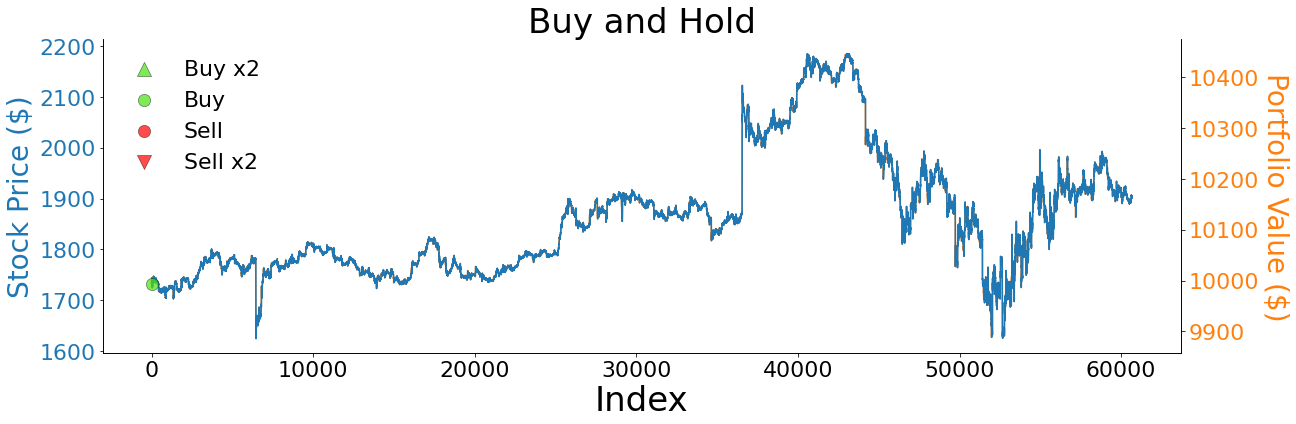

In [9]:
# BUY AND HOLD
buy_and_hold = Environment(val_data["close"].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

actions = [BUY]*(len(val_data))
for action in actions:

    _, reward, done, _ = buy_and_hold.step(action)
    
    if done:
        break

df = pd.DataFrame(buy_and_hold.logger, columns=["epoch", "reward", "portfolio", "trades", "curr_step"])        
plot(val_data["close"].to_list(), actions, df.portfolio, right_y_adjust=1.1, title="Buy and Hold",
     legend_loc="upper left")

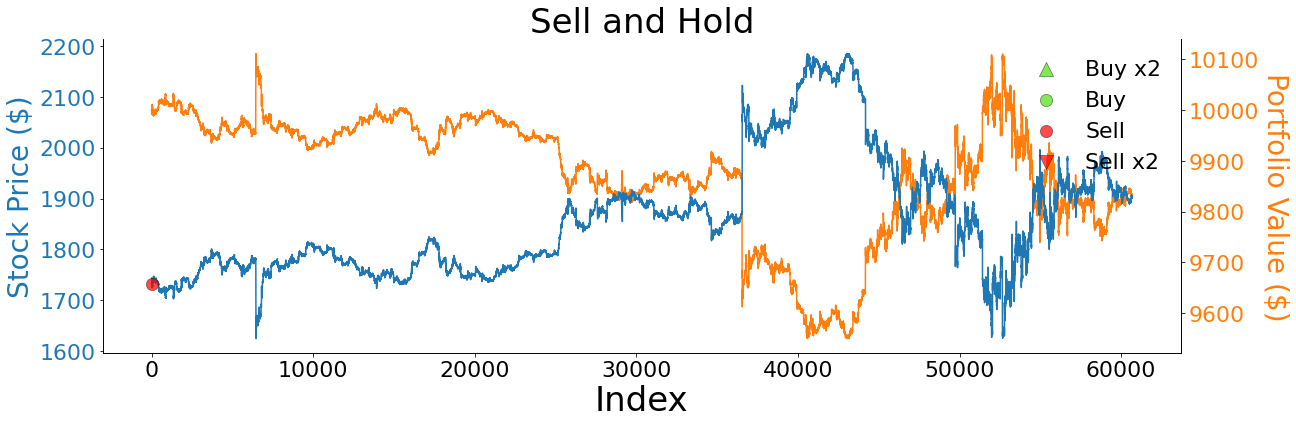

In [10]:
# SELL and HOLD
val_range = [i for i in range(12, 7-1, -1)]
val_data = load_data(val_range)


sell_and_hold = Environment(val_data["close"].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

actions = [SELL]*(len(val_data))
for action in actions:

    _, reward, done, _ = sell_and_hold.step(action)
    
    if done:
        break

df = pd.DataFrame(sell_and_hold.logger, columns=["epoch", "reward", "portfolio", "trades", "curr_step"])        
plot(val_data["close"].to_list(), actions, df.portfolio, right_y_adjust=1.1, title="Sell and Hold",
    legend_loc="upper right")

In [6]:
data = load_data([24])

In [8]:
fake = 300*np.sin(np.linspace(0, 3141.592, len(data))/50) + 1900 + np.random.normal(50, 50, len(data))
data = fake

env = Environment(data, balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

model = DQN(MlpPolicy, env, seed=SEED)

model.learn(total_timesteps=10_000) 

#model.save("dqn_sin_data")

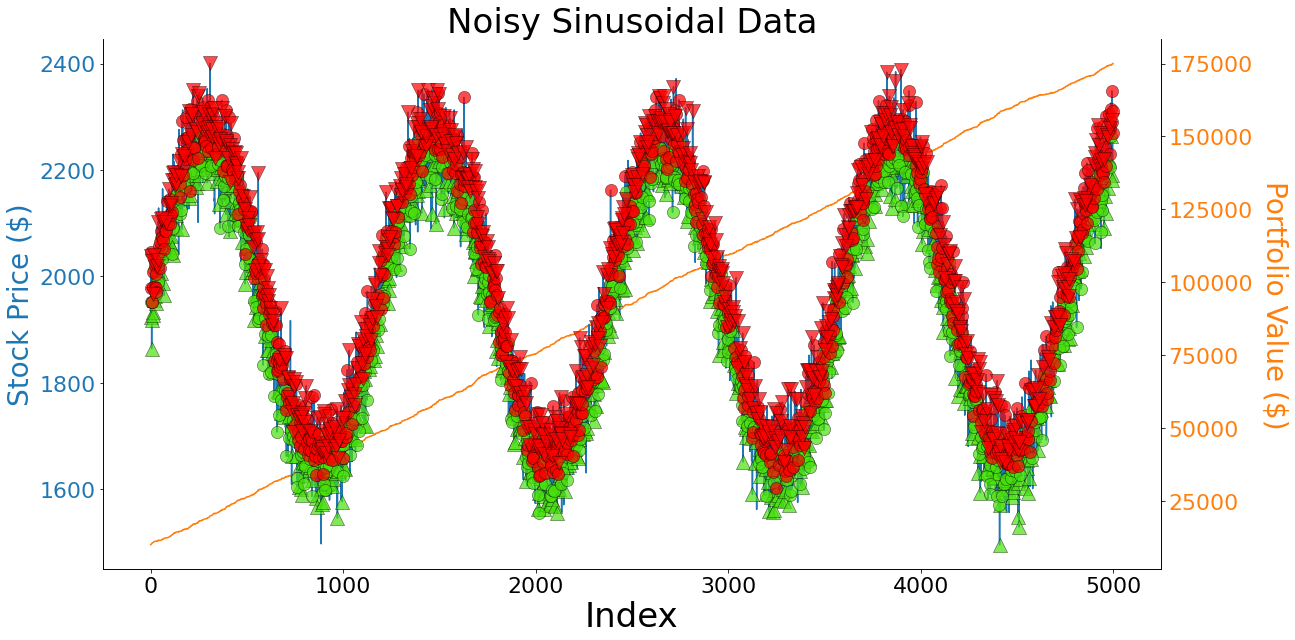

In [15]:
#model = DQN.load("dqn_sin_data")

fake = 300*np.sin(np.linspace(0, 3141.592, len(data))/50) + 1900+ np.random.normal(50, 50, len(data))
data = fake

env = Environment(data, balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
state = env.reset(rand_start=False)

portfolio_values = []
prices = []
actions = []

for i in range(5_000):
    action, _ = model.predict(state)

    price, portfolio_value = env.get_data()
    actions.append(action)
    prices.append(price)
    portfolio_values.append(portfolio_value)

    state, reward, done, _ = env.step(action)

    if done:
        break

plot(prices, actions, portfolio_values, right_y_adjust=1.12, title="Noisy Sinusoidal Data", 
     filename="noisy_sin_data", legend=False)

In [94]:
fake = 300*np.sin(np.linspace(0, 3141.592, len(data))/50) + 1900 
data = fake

env = Environment(data, balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

model = DQN(MlpPolicy, env, seed=SEED)

model.learn(total_timesteps=10_000) 

#model.save("dqn_sin_data_no_noise")

In [16]:
#model = DQN.load("dqn_sin_data_no_noise")
fake = 300*np.sin(np.linspace(0, 3141.592, len(data))/50) + 1900 
data = fake

env = Environment(data, balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
state = env.reset(rand_start=False)

portfolio_values = []
prices = []
actions = []

for i in range(5_000):
    action, _ = model.predict(state)

    price, portfolio_value = env.get_data()
    actions.append(action)
    prices.append(price)
    portfolio_values.append(portfolio_value)

    state, reward, done, _ = env.step(action)

    if done:
        break


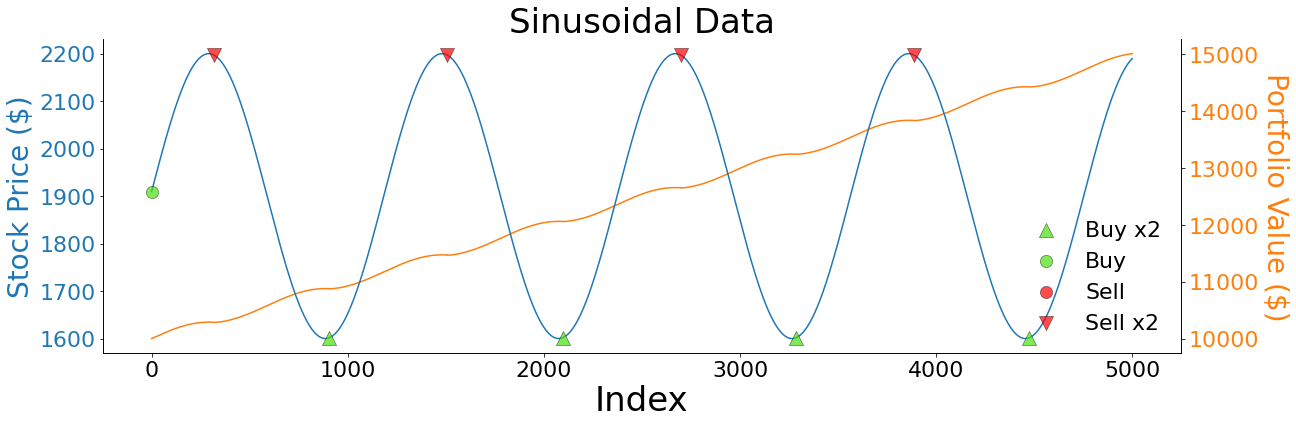

In [11]:
plot(prices, actions, portfolio_values, right_y_adjust=1.1, title="Sinusoidal Data", filename="sin_data",
    legend_loc="lower right")

In [11]:
fake = 1000 - np.abs(np.arange(0, len(data)) - len(data)/2) * 0.05
data = fake

env = Environment(data, balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

model = DQN(MlpPolicy, env, seed=SEED)

model.learn(total_timesteps=10_000) 

#model.save("dqn_triangle_no_noise")

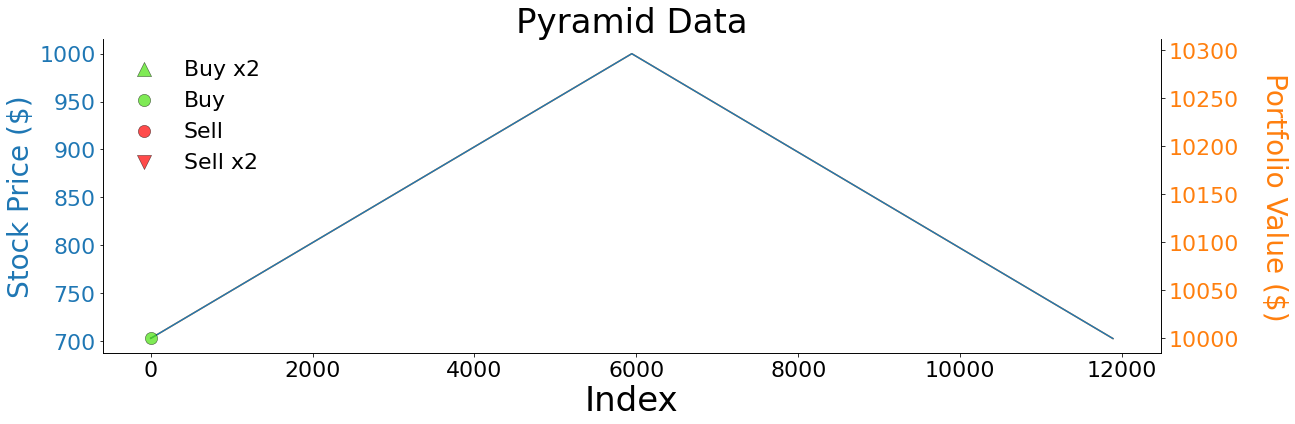

In [53]:
#model = DQN.load("dqn_triangle_no_noise")

fake = 1000 - np.abs(np.arange(0, len(data)) - len(data)/2) * 0.05
data = fake

env = Environment(data, balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
state = env.reset(rand_start=False)

portfolio_values = []
prices = []
actions = []

for i in range(len(data)):
    action, _ = model.predict(state)

    price, portfolio_value = env.get_data()
    actions.append(action)
    prices.append(price)
    portfolio_values.append(portfolio_value)

    state, reward, done, _ = env.step(action)

    if done:
        break

plot(prices, actions, portfolio_values, right_y_adjust=1.12, title="Pyramid Data", filename="triangle_data")

In [26]:
fake = np.random.normal(1000, 50, len(data)) - np.abs(np.arange(0, len(data)) - len(data)/2) * 0.05
data = fake

env = Environment(data, balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

model = DQN(MlpPolicy, env, seed=SEED)

model.learn(total_timesteps=10_000) 

#model.save("dqn_triangle")

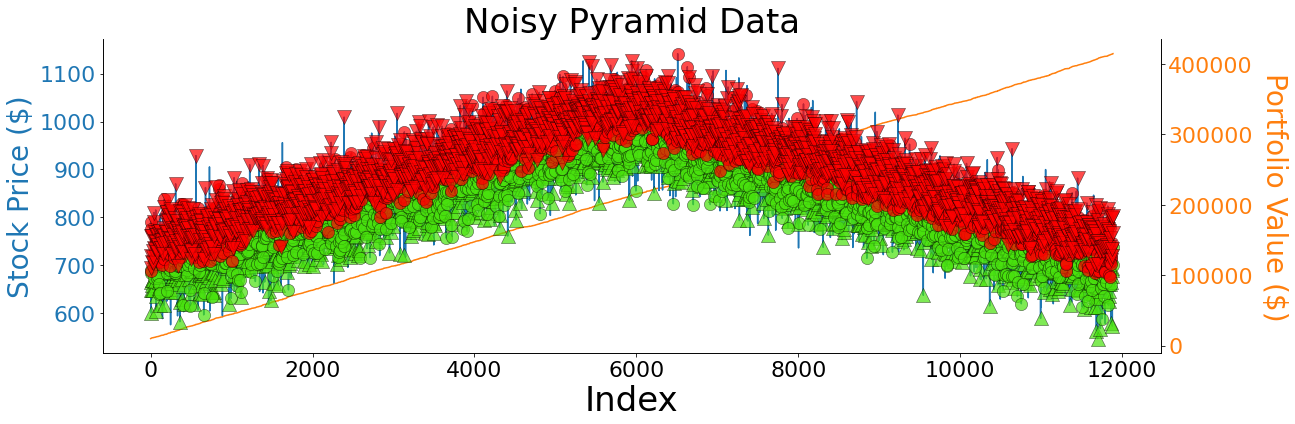

In [52]:
#model = DQN.load("dqn_triangle")

fake = np.random.normal(1000, 50, len(data)) - np.abs(np.arange(0, len(data)) - len(data)/2) * 0.05
data = fake

env = Environment(data, balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
state = env.reset(rand_start=False)

portfolio_values = []
prices = []
actions = []

for i in range(len(data)):
    action, _ = model.predict(state)

    price, portfolio_value = env.get_data()
    actions.append(action)
    prices.append(price)
    portfolio_values.append(portfolio_value)

    state, reward, done, _ = env.step(action)

    if done:
        break

plot(prices, actions, portfolio_values, right_y_adjust=1.12, title="Noisy Pyramid Data", 
     filename="noisy_pyramid_data", legend=False)

In [47]:
INITIAL_BALANCE = 10_000
PAST_TICKS = 20
SELL, HOLD, BUY = 0, 1, 2
val_range = [i for i in range(12, 7-1, -1)]
val_data = load_data(val_range)

extra_path = "extras/"
env = Environment(val_data["close"].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

model = DQN.load(extra_path + "model-fluent-sweep-45")


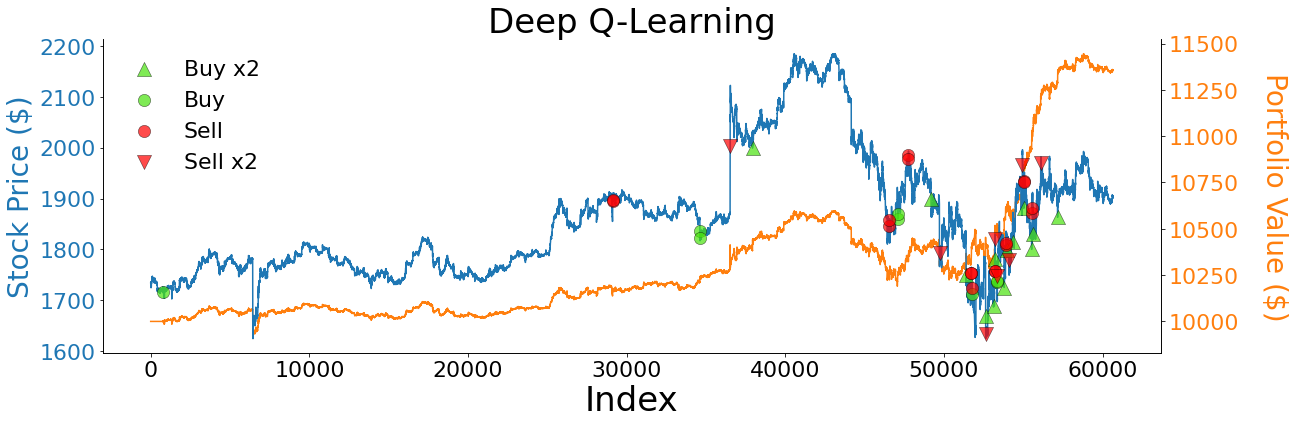

In [4]:
state = env.reset(rand_start=False)

portfolio_values = []
prices = []
actions = []

for i in range(len(val_data)):
    action, _ = model.predict(state)

    price, portfolio_value = env.get_data()
    
    actions.append(action)
    prices.append(price)
    
    portfolio_values.append(portfolio_value)

    state, reward, done, _ = env.step(action)
    
    if done:
        break
plot(prices, actions, portfolio_values, right_y_adjust=1.12, title="Deep Q-Learning")

## Test Data

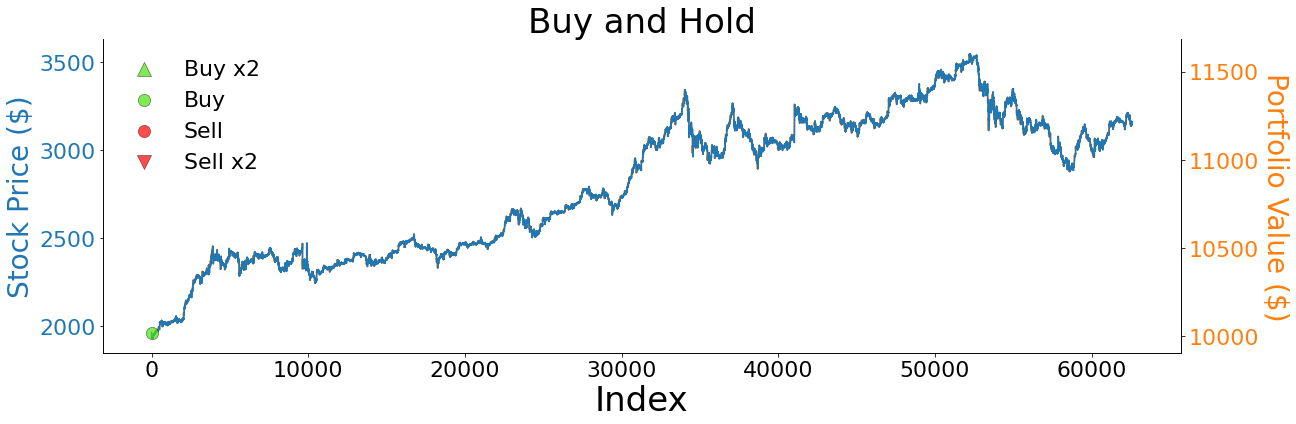

In [12]:
# BUY AND HOLD
buy_and_hold = Environment(test_data["close"].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

actions_buy = [BUY]*(len(test_data))
for action in actions_buy:

    _, reward, done, _ = buy_and_hold.step(action)
    
    if done:
        break

buy_logs = pd.DataFrame(buy_and_hold.logger, columns=["epoch", "reward", "portfolio", "trades", "curr_step"])        
plot(test_data["close"].to_list(), actions_buy, buy_logs.portfolio, right_y_adjust=1.1, title="Buy and Hold",
     legend_loc="upper left")

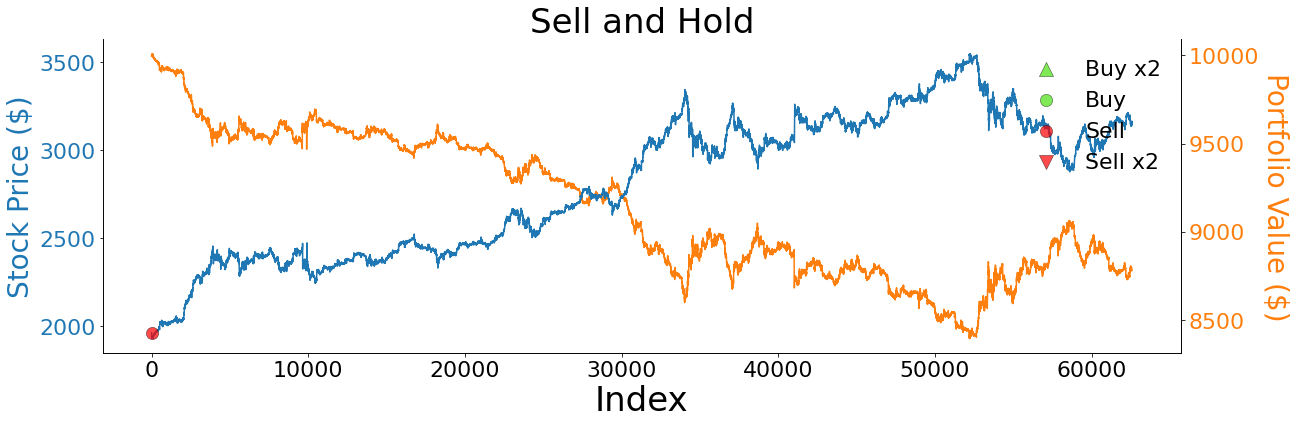

In [13]:
# SELL and HOLD
sell_and_hold = Environment(test_data["close"].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

actions_sell = [SELL]*(len(test_data))
for action in actions_sell:

    _, reward, done, _ = sell_and_hold.step(action)
    
    if done:
        break

sell_logs = pd.DataFrame(sell_and_hold.logger, columns=["epoch", "reward", "portfolio", "trades", "curr_step"])        
plot(test_data["close"].to_list(), actions_sell, sell_logs.portfolio, right_y_adjust=1.1, title="Sell and Hold",
    legend_loc="upper right")

In [60]:
# For this, make sure you run LSTM.py to obtain the LSTM logs file first
lstm = pd.read_csv(extra_path + "LSTM_portfolio_values_good", header=None, names=["index","portfolio_values"])

In [73]:
# EPOCH 28 gives the best portfolio values on validation data
# path = f'./checkpoint_logs/DQN/DQN_{28*10_000}_steps'
path = extra_path + "DQN_280000_steps"

INITIAL_BALANCE = 10_000
PAST_TICKS = 20
SELL, HOLD, BUY = 0, 1, 2

test_range = [i for i in range(6, 1-1, -1)]
test_data = load_data(test_range)

env = Environment(test_data["close"].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

model = DQN.load(path)

state = env.reset(rand_start=False)

portfolio_values = []
prices = []
actions = []

for i in range(len(test_data)):
    action, _ = model.predict(state)

    price, portfolio_value = env.get_data()
    
    actions.append(action)
    prices.append(price)
    
    portfolio_values.append(portfolio_value)

    state, reward, done, _ = env.step(action)
    
    if done:
        break

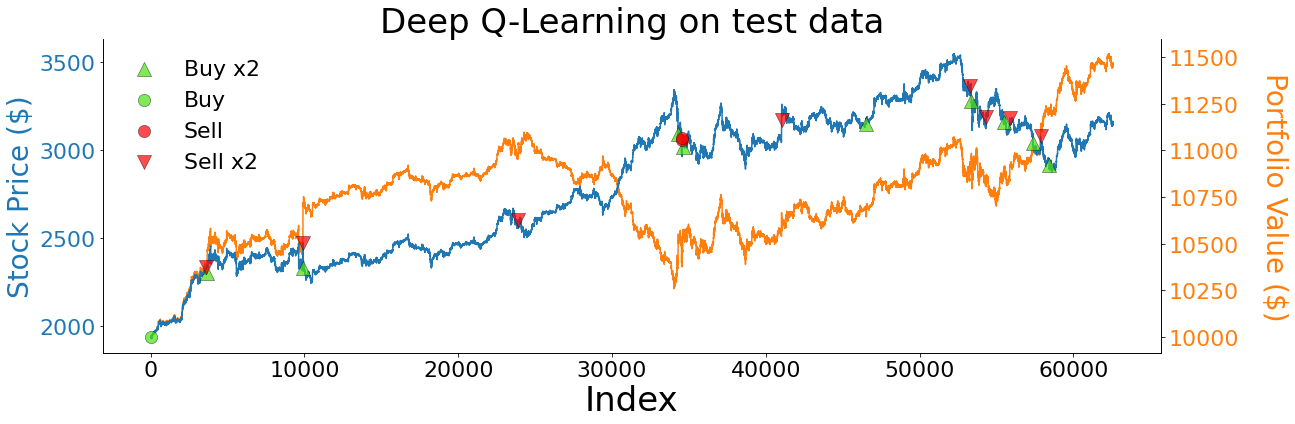

In [76]:
plot(prices, actions, portfolio_values, right_y_adjust=1.12, title="Deep Q-Learning on test data")

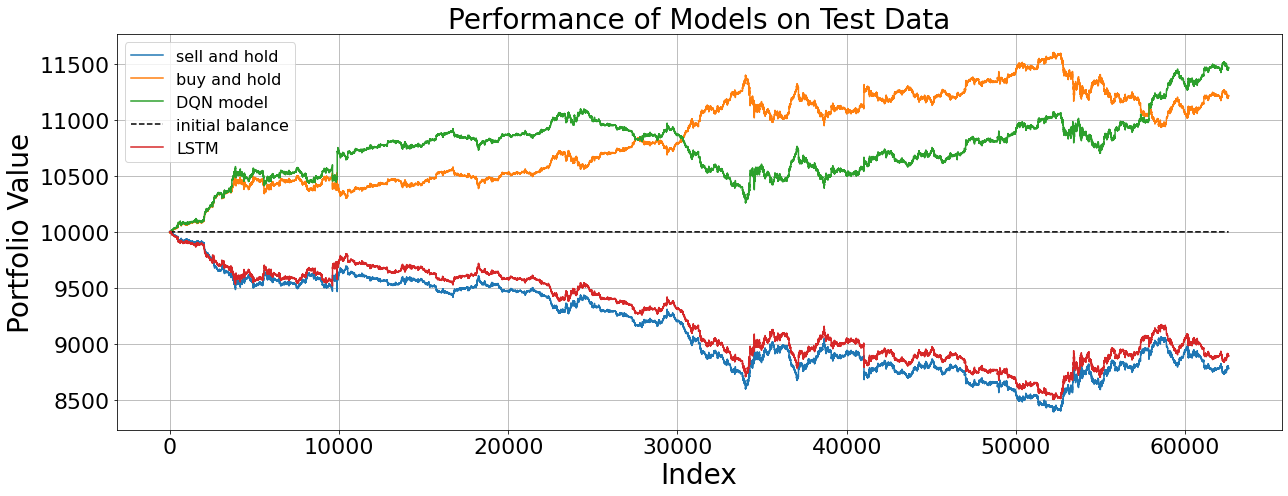

In [75]:
SMALL, MED, LARGE = 22, 28, 34

fig, ax = plt.subplots(figsize=(18,7))
length_index = len(sell_logs.portfolio)

plt.plot(np.arange(0, length_index), sell_logs.portfolio, label="sell and hold")
plt.plot(np.arange(0, length_index), buy_logs.portfolio, label="buy and hold") 
plt.plot(np.arange(0, length_index), portfolio_values, label="DQN model")
plt.plot(np.arange(0, length_index), [10_000]*length_index, c='k', linestyle='dashed', label="initial balance")
plt.plot(np.arange(0, length_index), [10_000]*37 + lstm.portfolio_values.to_list(), label="LSTM")

plt.xlabel("Index", fontsize=MED)
plt.ylabel("Portfolio Value", fontsize=MED)
plt.title("Performance of Models on Test Data", fontsize=MED)

plt.legend(fontsize=16)
plt.grid()
plt.tight_layout()

plt.savefig("test_data_good2")